In [60]:
import numpy as np
"""

This program solves Initial Value Problems (IVP).
We support three numerical meothds: Euler, Rk2, and Rk4

Example Usage:

    def yderive_func(t,y,a,b,c):
        yderive = np.zeros(len(y))
        yderive[0] = 0
        yderive[1] = a, ...
        return yderive

    y0  = [0,1]
    t_span = (0,1)
    t_eval =np.linspace(0,1,100)

    sol = solve_ivp(yderive_func, t_span, y0, 
                    method="RK4",t_eval=t_eval, args=(K,M))


    See `solve_ivp` for detailed description. 

Author: Kuo-Chuan Pan, NTHU 2022.10.06
For the course, computational physics lab

"""
def solve_ivp(derive_func, t_span, y0, method, t_eval, args):
    """
    Solve Initial Value Problems. 

    :param derive_func: a function to describe the derivative of the desired function
    :param t_span: 2-tuple of floats. the time range to compute the IVP, (t0, tf)
    :param y0: an array. The initial state
    :param method: string. Numerical method to compute. 
                   We support "Euler", "RK2" and "RK4".
    :param t_eval: array_like. Times at which to store the computed solution, 
                   must be sorted and lie within t_span.
    :param *args: extra arguments for the derive func.

    :return: array_like. solutions. 

    Note: the structe of this function is to mimic the scipy.integrate
          In the numerical scheme we designed, we didn't check the consistentcy between
          t_span and t_eval. Be careful. 

    """

    sol  = np.zeros((len(y0),len(t_eval))) # define the shape of the solution
    dt = t_eval[1] - t_eval[0]

    for i, t in enumerate(t_eval):
        if i == 0:
            sol[:,i] = y0
        else:
            sol[:,i] = _update(derive_func, sol[:,i-1], dt, t, method, *args)

    return sol

def _update(derive_func, y0, dt, t, method, *args):
    """
    Update the IVP with different numerical method

    :param derive_func: the derivative of the function y'
    :param y0: the initial conditions at time t
    :param dt: the time step dt
    :param t: the time
    :param method: the numerical method
    :param *args: extral parameters for the derive_func

    :return: the next step condition y

    """

    if method=="Euler":
        ynext = _update_euler(derive_func,y0,dt,t,*args)
    elif method=="RK2":
        ynext = _update_rk2(derive_func,y0,dt,t,*args)
    elif method=="RK4":
        ynext = _update_rk4(derive_func,y0,dt,t,*args)
    else:
        print("Error: mysolve doesn't supput the method",method)
        quit()
    return ynext

def _update_euler(derive_func,y0,dt,t,*args):
    """
    Update the IVP with the Euler's method

    :return: the next step solution y

    """
    
    k = derive_func(t, y0, *args)
    y0 = y0 + dt*k

    return y0 # <- change here. just a placeholder

def _update_rk2(derive_func,y0,dt,t,*args):
    """
    Update the IVP with the RK2 method

    :return: the next step solution y
    """

    k1 = derive_func(t, y0, *args)
    k2 = derive_func(t+dt, y0+dt*k1, *args)

    y0 = y0 + 0.5*dt*(k1+k2)

    return y0 # <- change here. just a placeholder

def _update_rk4(derive_func,y0,dt,t,*args):
    """
    Update the IVP with the RK4 method

    :return: the next step solution y
    """

    k1 = derive_func(t, y0, *args)
    k2 = derive_func(t+0.5*dt, y0+0.5*dt*k1, *args)
    k3 = derive_func(t+0.5*dt, y0+0.5*dt*k2, *args)
    k4 = derive_func(t+dt, y0+dt*k3, *args)

    y0 = y0 + (1/6)*dt*(k1+2*k2+2*k3+k4)

    return y0 # <- change here. just a placeholder

if __name__=='__main__':


    """
    
    Testing mysolver.solve_ivp()

    Kuo-Chuan Pan 2022.10.07

    """


    def oscillator(t,y,K,M):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the initial condition y
        :param K: the spring constant
        :param M: the mass of the oscillator

        """

        w = np.sqrt(K/M)
        y_i = np.zeros(shape=y.shape)
        y_i[0] = y[1]
        y_i[1] = -w**2*y[0]
        y = y_i
 
        return y # <- change here. just a placeholder

    A = 1
    t_span = (0, 10)
    y0     = np.array([A,0])
    t_eval = np.linspace(0,10,25)

    K = 1
    M = 1
    w = np.sqrt(K/M)

    sol_Euler = solve_ivp(oscillator, t_span, y0, 
                          method="Euler",t_eval=t_eval, args=(K,M))
    sol_RK2 = solve_ivp(oscillator, t_span, y0, 
                        method="RK2",t_eval=t_eval, args=(K,M))
    sol_RK4 = solve_ivp(oscillator, t_span, y0, 
                        method="RK4",t_eval=t_eval, args=(K,M))

    #print("sol=",sol[0])
    print("Done!")


Done!


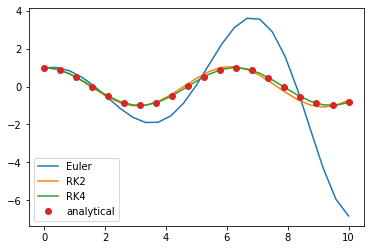

In [61]:
import matplotlib.pyplot as plt

t = np.linspace(t_span[0],t_span[1],20)
sol_a = A*np.cos(w*t)
plt.plot(t_eval, sol_Euler[0], label='Euler')
plt.plot(t_eval, sol_RK2[0], label='RK2')
plt.plot(t_eval, sol_RK4[0], label='RK4')
plt.plot(t, sol_a, 'o', label='analytical')
plt.legend()